In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Reading File
df = pd.read_csv('/content/drive/MyDrive/DataSets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.shape

(150, 6)

# Data Cleaning

In [13]:
# Drop Unnecessary columns
df.drop(['Id'], axis=1, inplace=True)

In [14]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [15]:
df.duplicated().sum()

np.int64(3)

In [16]:
df.drop_duplicates(inplace=True)

# Data Visualization

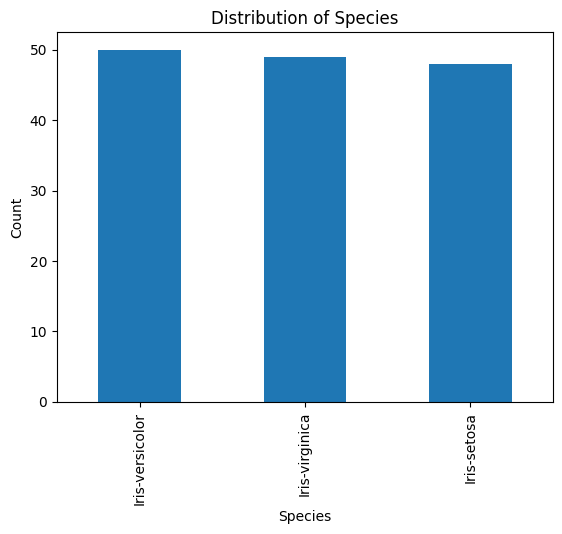

In [17]:
# Distribution of target column
df.Species.value_counts().plot(kind='bar')
plt.title("Distribution of Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

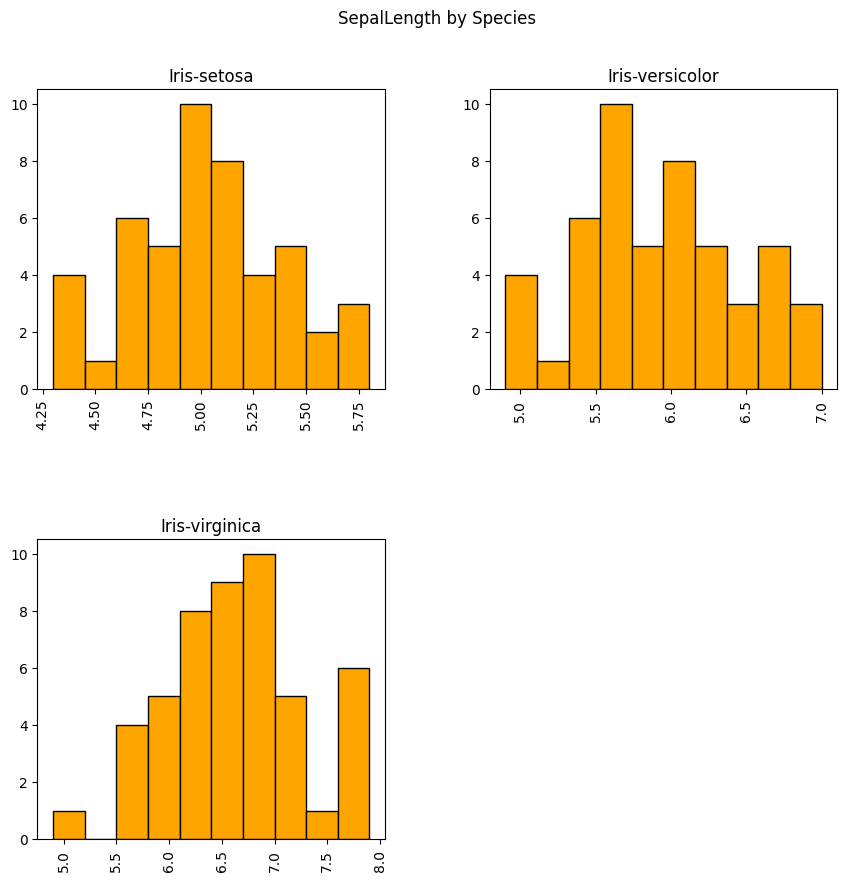

In [18]:
# Distribution of Sepal Length Across Iris Species
df.hist(column = "SepalLengthCm", by = "Species", figsize = (10,10), color = "orange", edgecolor = "black")
plt.suptitle("SepalLength by Species")
plt.xlabel("length")
plt.ylabel("count")
plt.show()

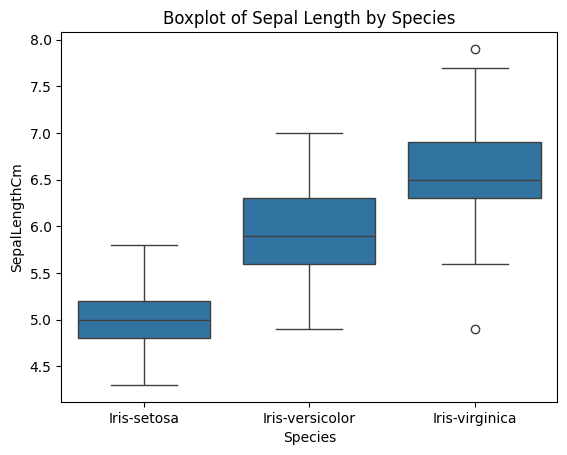

In [19]:
# Creating Boxplot of Sepal Length by Species
sns.boxplot( x = "Species", y = "SepalLengthCm", data=df)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

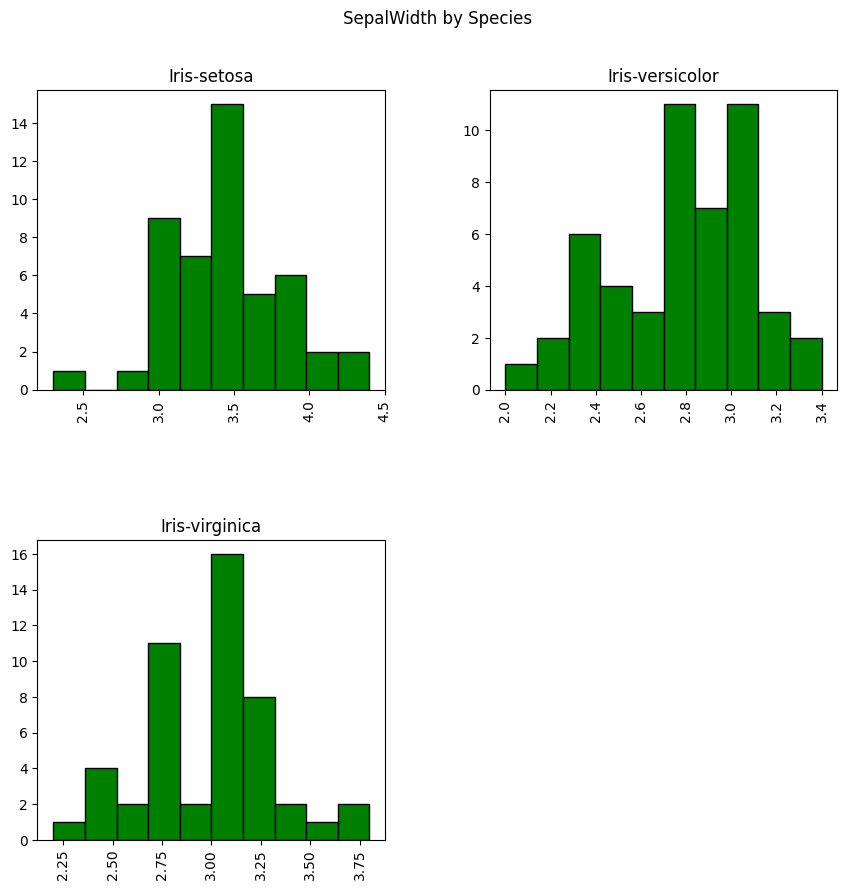

In [20]:
# Distribution of Sepal Width Across Iris Species
df.hist(column="SepalWidthCm", by="Species", figsize=(10,10), color="green", edgecolor="black")
plt.suptitle("SepalWidth by Species")
plt.xlabel("Width")
plt.ylabel("Count")
plt.show()

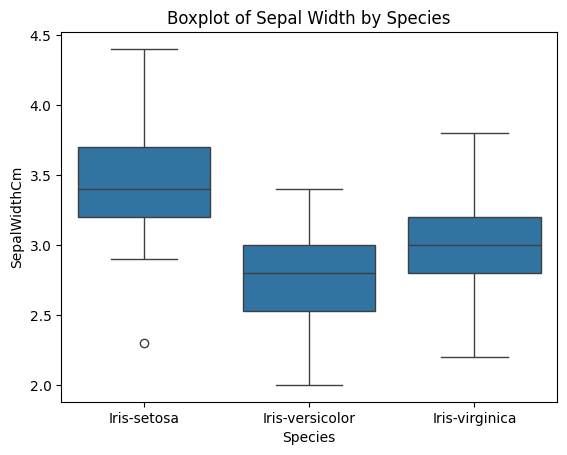

In [21]:
# Creating Boxplot of Sepal Width by Species
sns.boxplot(x="Species", y="SepalWidthCm", data=df)
plt.title("Boxplot of Sepal Width by Species")
plt.show()

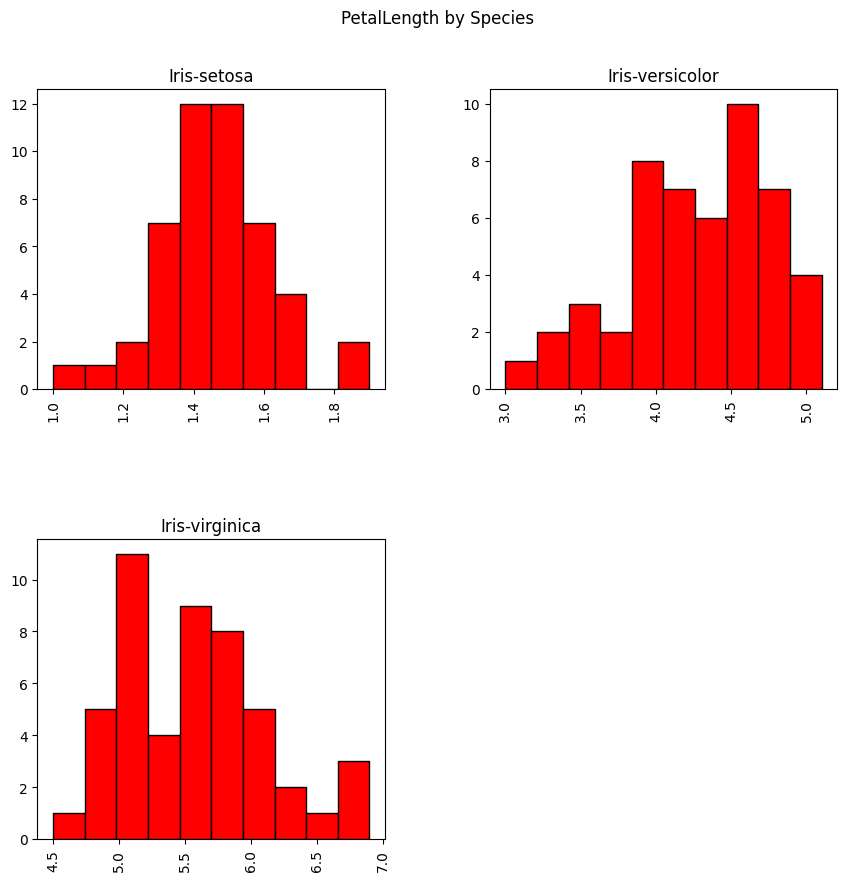

In [22]:
# Distribution of Petal Length Across Iris Species
df.hist(column="PetalLengthCm", by="Species", figsize=(10,10), color="red", edgecolor="black")
plt.suptitle("PetalLength by Species")
plt.xlabel("lengh")
plt.ylabel("Count")
plt.show()

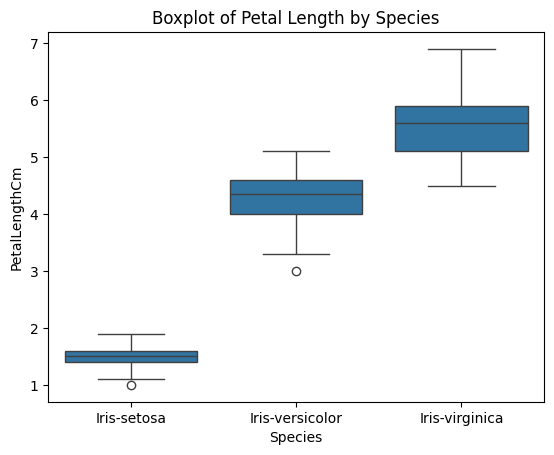

In [23]:
# Creating Boxplot of Petal Length by Species
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.title("Boxplot of Petal Length by Species")
plt.show()

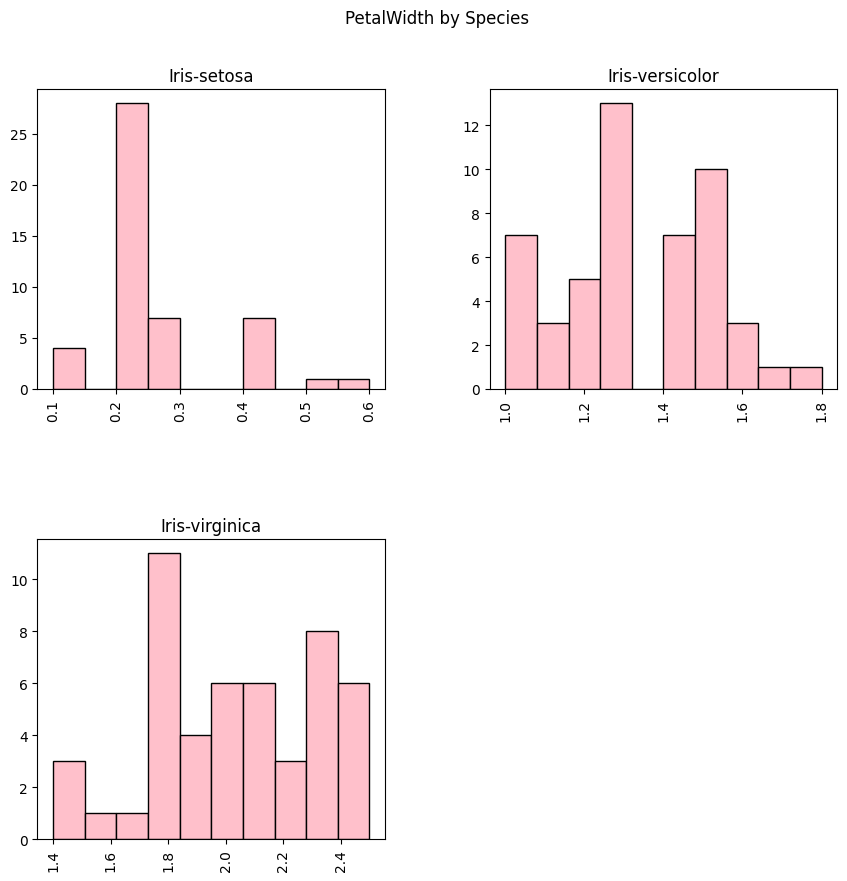

In [24]:
# Distribution of Petal Width Across Iris Species
df.hist(column="PetalWidthCm", by="Species", figsize=(10,10), color="pink", edgecolor="black")
plt.suptitle("PetalWidth by Species")
plt.xlabel("Width")
plt.ylabel("Count")
plt.show()

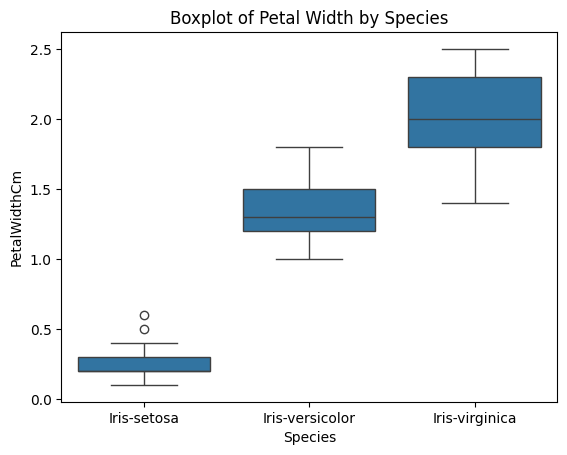

In [25]:
# Creating Boxplot of Petal Width by Species
sns.boxplot(x="Species", y="PetalWidthCm", data=df)
plt.title("Boxplot of Petal Width by Species")
plt.show()

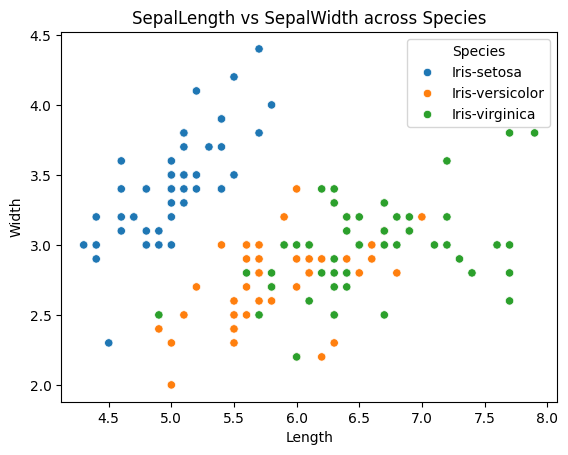

In [26]:
# Exploring relationship between SepalLength vs SepalWidth
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)
plt.title("SepalLength vs SepalWidth across Species")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend(title="Species")
plt.show()

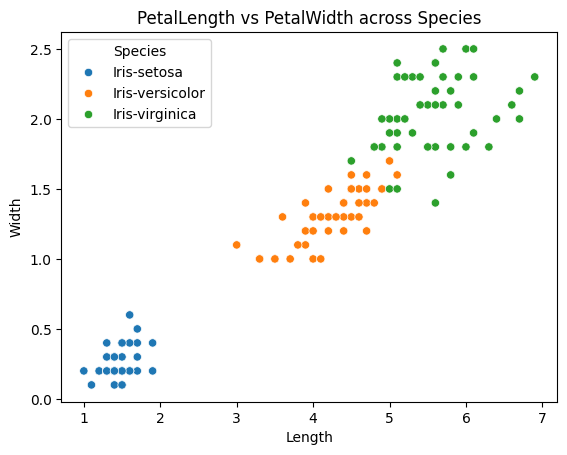

In [27]:
# Exploring relationship between PetalLength vs PetalWidth
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)
plt.title("PetalLength vs PetalWidth across Species")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend(title="Species")
plt.show()

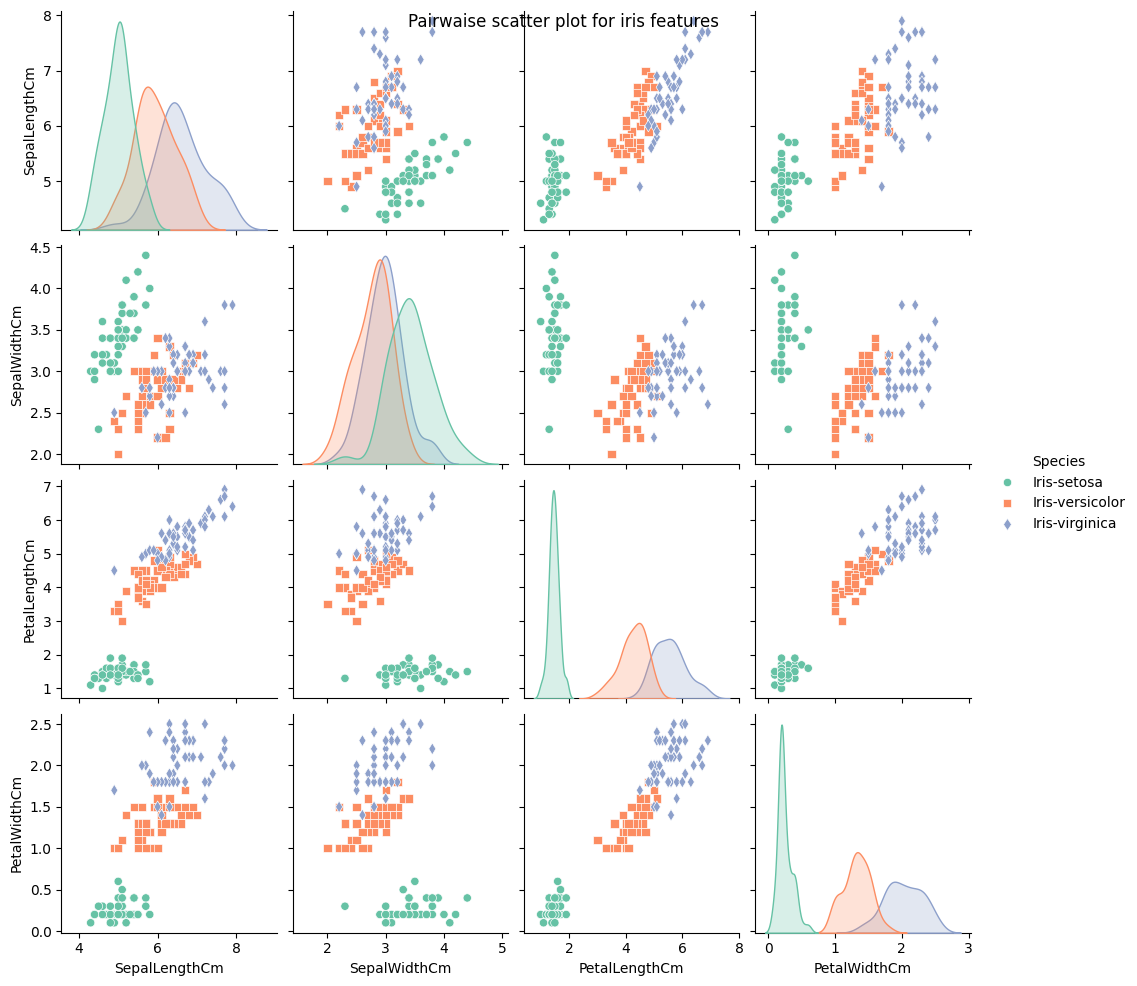

In [28]:
# Creating pairplot for each pair of features
sns.pairplot(df, hue="Species", markers=['o','s','d'], palette="Set2")
plt.suptitle("Pairwaise scatter plot for iris features")
plt.show()

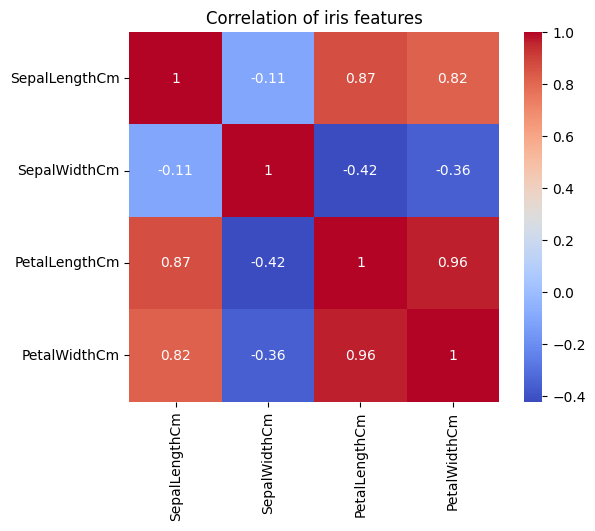

In [29]:
# Heatmap of iris features
numeric_df = df.drop(['Species'], axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation of iris features")
plt.show()

### Feature Engineering

In [30]:
X= df.drop("Species", axis=1)
y= df.Species

<Axes: xlabel='Species'>

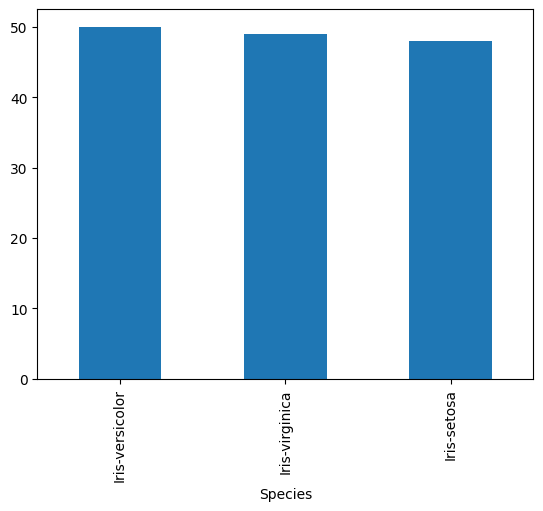

In [31]:
y.value_counts().plot(kind="bar")

In [32]:
# Balancing target column
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_new, y_new = sampler.fit_resample(X,y)

<Axes: xlabel='Species'>

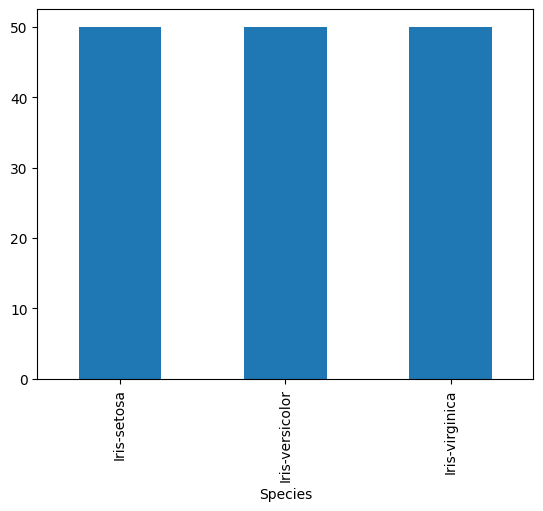

In [33]:
y_new.value_counts().plot(kind="bar")

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2)

# Modeling

In [35]:
# Training Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Importing Evaluation matrces
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize

In [37]:
y_pred = model.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predictions": y_pred})

,Actual,Predictions
97,Iris-versicolor,Iris-versicolor
129,Iris-virginica,Iris-virginica
39,Iris-setosa,Iris-setosa
92,Iris-versicolor,Iris-versicolor
68,Iris-versicolor,Iris-virginica
5,Iris-setosa,Iris-setosa
40,Iris-setosa,Iris-setosa
51,Iris-versicolor,Iris-versicolor
145,Iris-virginica,Iris-virginica
57,Iris-versicolor,Iris-versicolor


RandomForestClassifier
Train Score: 1.0
Test Score: 0.9
Accuracy: 0.9
Precision: 0.9030303030303028
Recall: 0.9
F1 Score: 0.9002070393374741
Confusion Matrix:
 [[ 8  0  0]
 [ 0 10  2]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



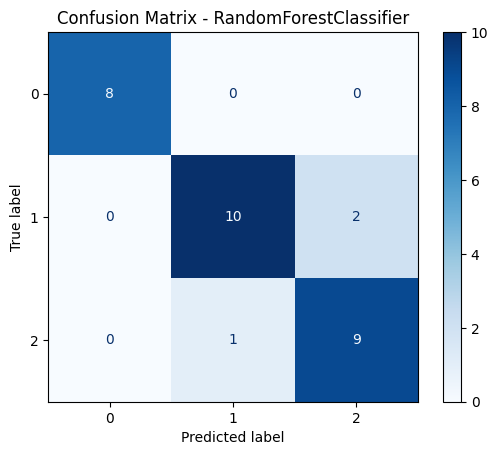

Overall ROC AUC Score (OVR): 0.9812962962962963


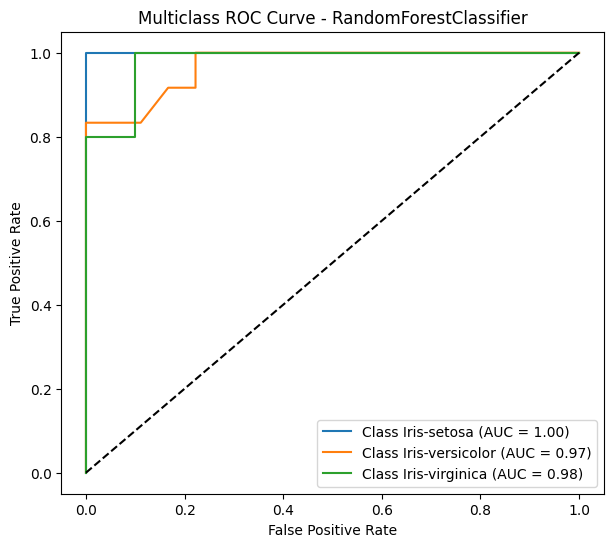

In [38]:
# Evaluation Metrics
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
name = type(model).__name__

# Displaying Metrics
print(name)
print("Train Score:", train_score)
print("Test Score:", test_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.show()

# ROC AUC Curve
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)
    # Unique classes
    classes = np.unique(y_test)
    n_classes = len(classes)
    # Binarize true labels
    y_test_bin = label_binarize(y_test, classes=classes)
    # Overall AUC Score (OVR)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    print("Overall ROC AUC Score (OVR):", roc_auc)

    # Plot ROC Curve for each class
    plt.figure(figsize=(7,6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        auc_score = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

    # Random guess line
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multiclass ROC Curve - {name}')
    plt.legend()
    plt.show()
